In [109]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from read_data import *

%matplotlib inline

In [110]:
#pref = '../outputs/t65/output_'
pref = '../outputs/soft_tests/bp/outflow_alt/tilt10_tv0001_s2_t2/n512/output_'
#pref = '../outputs/extraploglog_tests/bp/outflow_alt/tilt10_tv0001_s2_t2/n512/output_'
#pref = '../outputs/largepsi_tests/bp/outflow_alt/tilt10_tv0001_s2_t2/n512/output_'
HoR  = 1e-3
filenames = get_fn_list(pref,0,409201)
full_data = []
for i,fn in enumerate(filenames):
    print "Loading file %d..." % i
    full_data.append(build_table(fn,HoR))

Loading file 0...
Loading file 1...
Loading file 2...
Loading file 3...
Loading file 4...
Loading file 5...
Loading file 6...
Loading file 7...
Loading file 8...
Loading file 9...
Loading file 10...
Loading file 11...
Loading file 12...
Loading file 13...
Loading file 14...
Loading file 15...
Loading file 16...
Loading file 17...
Loading file 18...
Loading file 19...
Loading file 20...
Loading file 21...
Loading file 22...
Loading file 23...
Loading file 24...
Loading file 25...
Loading file 26...
Loading file 27...
Loading file 28...
Loading file 29...
Loading file 30...
Loading file 31...
Loading file 32...
Loading file 33...
Loading file 34...
Loading file 35...
Loading file 36...
Loading file 37...
Loading file 38...
Loading file 39...
Loading file 40...
Loading file 41...
Loading file 42...
Loading file 43...
Loading file 44...
Loading file 45...
Loading file 46...
Loading file 47...
Loading file 48...
Loading file 49...
Loading file 50...
Loading file 51...
Loading file 52...
Loa

IOError: ../outputs/soft_tests/bp/outflow_alt/tilt10_tv0001_s2_t2/n512/output_102.csv not found.

In [111]:
for i in range(no_file):
    full_data[i]["prec"] -= full_data[i]["prec"][-1]

In [112]:
no_file = len(full_data)

p_old = full_data[0]["prec"]
t_old = full_data[0]["t"][0]
full_data[0]["dpdt"] = np.zeros(len(full_data[0]["prec"]))
for i in range(1,no_file):
    p_new = full_data[i]["prec"]
    t_new = full_data[i]["t"][0]
    dt = t_new - t_old
    print t_new, t_old, dt
    dp = p_new - p_old
    print dp,dt
    full_data[i]["dpdt"] = dp/dt
    p_old = np.copy(p_new)
    t_old = np.copy(t_new)

41473950.0 0.0 41473950.0
         prec         
----------------------
     8245.532280152665
     8245.532270125588
     8245.532265494361
      8124.77746386032
       7982.0525201484
      7965.99596047766
     7936.457186234247
     7934.312512619414
      7871.68455065743
      7853.56491276012
                   ...
  0.005372134380539229
  0.004635405628804816
  0.003918284834928686
 0.0032202692018760137
  0.002540831618521318
  0.001879476832967207
 0.0012357377996085918
  0.000609277193381632
1.3374001947563663e-08
1.2458805376258653e-08
                   0.0
Length = 516 rows 41473950.0
82941270.0 41473950.0 41467320.0
       prec       
------------------
3327.8861294925373
3327.8861383138756
3147.8861431868863
 3103.706956940762
3075.0935856472643
3073.2717043745442
 3058.967485658821
2911.8857407836767
 2952.579495464375
 2814.035583017777
               ...
180.00536894193255
180.00463244744068
 180.0039155578019
  180.003217688078
180.00253846864223
180.00187726931622

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in divide
  del sys.path[0]


In [113]:
init_mass = integrate_mass(full_data[0])
for i in range(1,len(full_data)):
    print (init_mass - integrate_mass(full_data[i]))/init_mass

0.000272572755303695
0.0005929639922015801
0.0009383315809677608
0.0012947172154668977
0.0016612245701641418
0.0020359276436806143
0.0024168556485449208
0.0028032639770119933
0.0031947150355848843
0.0035906246045668676
0.00399112366619953
0.004395118871970073
0.00480266320491823
0.005213400215140394
0.005627085651362162
0.006043646821957674
0.006462953660655954
0.006884968037689189
0.007309467066678057
0.007736891282565903
0.00816688553326602
0.008599833454428522
0.00903576719266192
0.009474670779388834
0.009917032867711466
0.010362564990380617
0.010810988814572226
0.011262739816116078
0.011717038127056403
0.012173430746605114
0.012632235633618738
0.013093325079452824
0.013556053633926077
0.014020301982718374
0.01448602653179053
0.014953206984370578
0.015422082415773426
0.01589200693683887
0.016363215542012748
0.01683573489068735
0.0173094675206238
0.017784321395216022
0.01826012686064763
0.018736947629121124
0.01921478226362882
0.019693985414747973
0.020173741010737125
0.0206542987816

2386.259677330409
(102, 516, 13)
time = 2.902465e+09


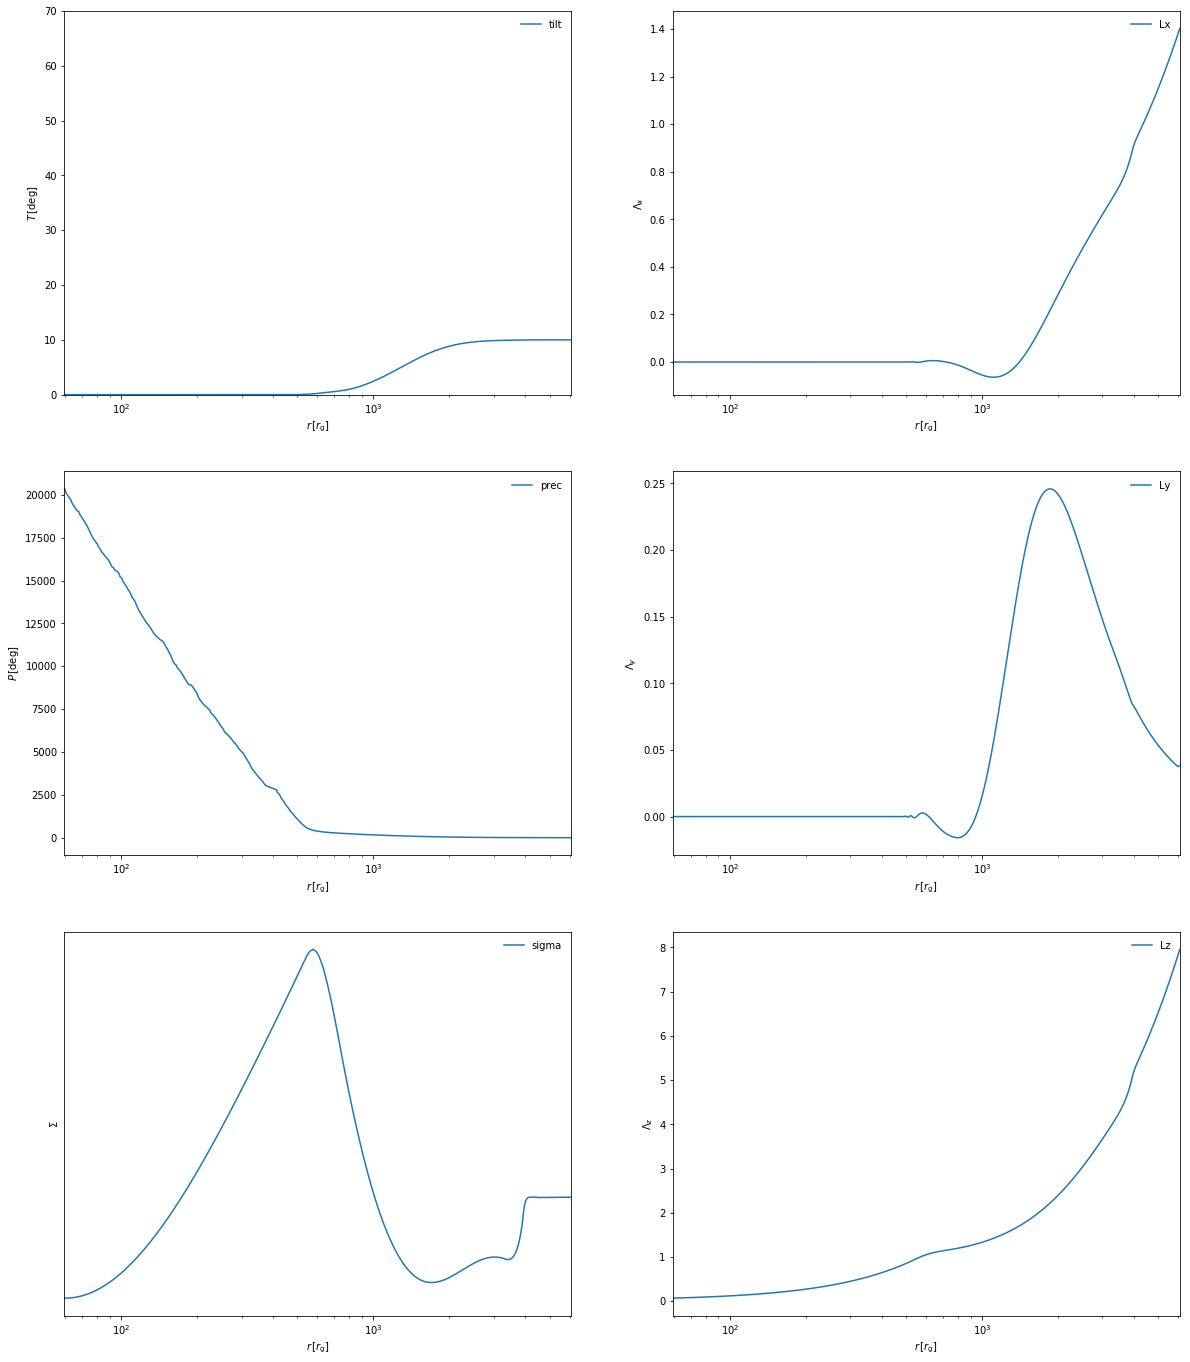

In [114]:
def plot_interface(table):
    plot_r  = table["r"]
    plot_d  = table["sigma"]
    plot_Lx = table["Lx"]
    plot_Ly = table["Ly"]
    plot_Lz = table["Lz"]
    plot_t  = table["tilt"]
    plot_p  = table["prec"]
    plot_dpdt = table["dpdt"]
    
    time   = table["t"][0]
    rmin = np.min(plot_r)
    rmax = np.max(plot_r)
    print "time = %e" % time
    
    fig, ax = plt.subplots(3,2,figsize=(20,24))
    
    ax[0][0].plot(plot_r,plot_t)
    ax[0][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[0][0].set_ylabel(r'$T\,[{\rm deg}]$')
    ax[0][0].set_ylim(0,70)
    ax[0][0].set_xlim(rmin,rmax)
    ax[0][0].set_xscale('log')
    ax[0][0].legend(frameon=False)

    ax[1][0].plot(plot_r,plot_p)
    ax[1][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[1][0].set_ylabel(r'$P\,[{\rm deg}]$')
    #ax[1][0].set_ylim(-1e-4,1e-4)
    ax[1][0].set_xlim(rmin,rmax)
    ax[1][0].set_xscale('log')
    ax[1][0].legend(frameon=False)

    ax[2][0].plot(plot_r,plot_d)
    ax[2][0].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][0].set_ylabel(r'$\Sigma$')
    #ax[2][0].set_ylim(-1e-4,1e-4)
    ax[2][0].set_xlim(rmin,rmax)
    ax[2][0].set_xscale('log')
    ax[2][0].set_yscale('log')
    ax[2][0].legend(frameon=False)

    ax[0][1].plot(plot_r,plot_Lx)
    ax[0][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[0][1].set_ylabel(r'$\Lambda_x$')
    #ax[0][1].set_ylim(0,50000)
    ax[0][1].set_xlim(rmin,rmax)
    ax[0][1].set_xscale('log')
    ax[0][1].legend(frameon=False)

    if 1: # Ly
        ax[1][1].plot(plot_r,plot_Ly)
        ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][1].set_ylabel(r'$\Lambda_y$')
        #ax[1][1].set_ylim(-50,1)
        ax[1][1].set_xlim(rmin,rmax)
        ax[1][1].set_xscale('log')
        ax[1][1].legend(frameon=False)
    if 0: # dpdt
        ax[1][1].plot(plot_r,plot_dpdt)
        ax[1][1].set_xlabel(r'$r\,[r_{\rm g}]$')
        ax[1][1].set_ylabel(r'$\dot{P}$')
        #ax[1][1].set_ylim(-50,1)
        ax[1][1].set_xlim(rmin,rmax)
        ax[1][1].set_xscale('log')
        ax[1][1].legend(frameon=False)


    ax[2][1].plot(plot_r,plot_Lz)
    ax[2][1].set_xlabel(r'$r\,[r_{\rm g}]$')
    ax[2][1].set_ylabel(r'$\Lambda_z$')
    #ax[2][1].set_ylim(-1e-3,1e-3)
    ax[2][1].set_xlim(rmin,rmax)
    ax[2][1].set_xscale('log')
    ax[2][1].legend(frameon=False)

    
    return fig

print np.max(full_data[0]["sigma"])
print np.shape(full_data)
fig = plot_interface(full_data[70])

plt.show()
    


time = 2.550671e+06
(2,)


<Figure size 432x288 with 0 Axes>

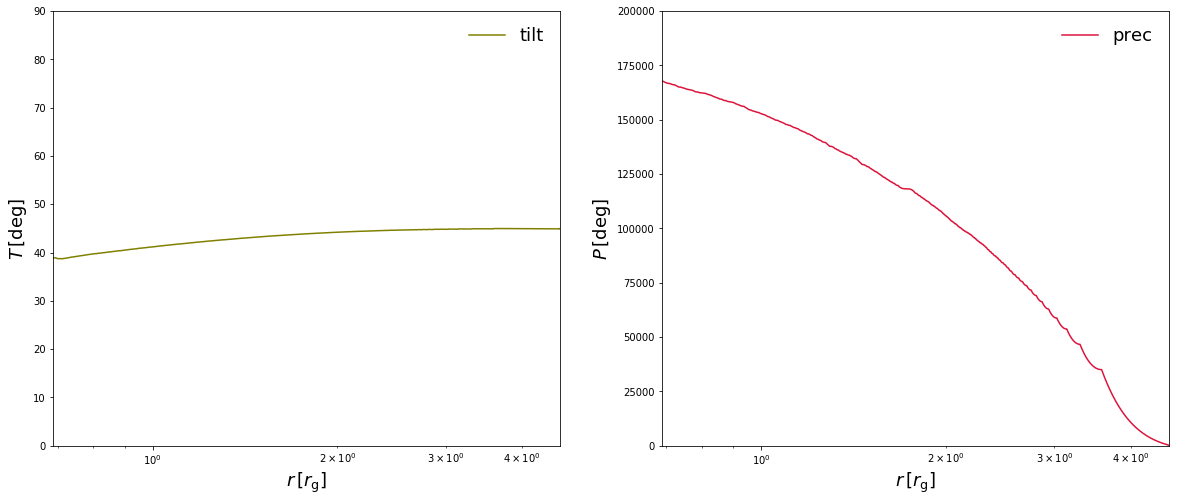

In [13]:
def plot_interface_vid(table):
    plot_r  = table["r"]
    plot_d  = table["sigma"]
    plot_p  = table["prec"]
    plot_t  = table["tilt"]

    time   = table["t"][0]
    rmin = np.min(plot_r)
    rmax = np.max(plot_r)
    print "time = %e" % time
    
    fig, ax = plt.subplots(1,2,figsize=(20,8))

    print np.shape(ax)
    ax[0].plot(plot_r,plot_t,color='olive')
    ax[0].set_xlabel(r'$r\,[r_{\rm g}]$',fontsize=18)
    ax[0].set_ylabel(r'$T\,[{\rm deg}]$',fontsize=18)
    ax[0].set_ylim(0,90)
    ax[0].set_xlim(rmin,rmax)
    ax[0].set_xscale('log')
    ax[0].legend(frameon=False,fontsize=18)

    ax[1].plot(plot_r,plot_p,color='crimson')
    ax[1].set_xlabel(r'$r\,[r_{\rm g}]$',fontsize=18)
    ax[1].set_ylabel(r'$P\,[{\rm deg}]$',fontsize=18)
    ax[1].set_ylim(0,200000)
    ax[1].set_xlim(rmin,rmax)
    ax[1].set_xscale('log')
    #ax[1].set_yscale('log')
    ax[1].legend(frameon=False,fontsize=18)

    return fig

plt.clf()
fig = plot_interface_vid(full_data[-1])
plt.show()

In [14]:
##################
## User Parameters

# Prefix will be appended with 001.png,002.png,003.png,...
path_prefix = "../plots/doesntmatter_"

# Movie path will be appended with .mp4
movie_path = "../plots/t45"

# Make a movie if auto = 1
auto = 1

# Remove all files starting with path_prefix if clean = 1
clean = 0

##
##################

## Call plotting interface to build frames
png_names = []
frame_no = 0
for i in range(0,100,1):
    suffix = str(frame_no).zfill(4)
    fig = plot_interface_vid(full_data[i])
    fig.savefig(path_prefix+suffix)
    png_names.append(path_prefix+suffix + ".png")
    plt.clf()
    frame_no += 1

# Use ffmpeg from command line interface
if (auto):
    !ffmpeg -r 3 -s 1920x1080 -i {path_prefix}%04d.png {movie_path}.mp4

# You can just delete the .png files if you already made your movie
if (clean):
    for name in png_names:
        !rm $name

time = 0.000000e+00
(2,)
time = 2.551039e+04
(2,)
time = 5.102391e+04
(2,)
time = 7.651989e+04
(2,)
time = 1.020320e+05
(2,)
time = 1.275579e+05
(2,)
time = 1.530417e+05
(2,)
time = 1.785479e+05
(2,)
time = 2.040636e+05
(2,)
time = 2.295670e+05
(2,)
time = 2.550814e+05
(2,)
time = 2.805968e+05
(2,)
time = 3.060908e+05
(2,)
time = 3.315989e+05
(2,)
time = 3.570977e+05
(2,)
time = 3.826144e+05
(2,)
time = 4.081267e+05
(2,)
time = 4.336366e+05
(2,)
time = 4.591444e+05
(2,)
time = 4.846365e+05
(2,)
time = 5.101467e+05
(2,)
time = 5.356411e+05
(2,)
time = 5.611509e+05
(2,)
time = 5.866650e+05
(2,)
time = 6.121761e+05
(2,)
time = 6.376687e+05
(2,)
time = 6.631749e+05
(2,)
time = 6.886858e+05
(2,)
time = 7.141960e+05
(2,)
time = 7.396938e+05
(2,)
time = 7.652198e+05
(2,)
time = 7.907215e+05
(2,)
time = 8.162157e+05
(2,)
time = 8.417330e+05
(2,)
time = 8.672321e+05
(2,)
time = 8.927420e+05
(2,)
time = 9.182597e+05
(2,)
time = 9.437532e+05
(2,)
time = 9.692643e+05
(2,)
time = 9.947611e+05
(2,)


<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>